#  [Lasso Regression](https://youtu.be/HLF4bFbBgwk?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH) 
<br>

![ytss](assets/lassoR.png)  
The only difference in the lasso regression from ridge regression is that it adds a shrinakge coefficient not in squared form but in absolute form `|w|`.

## Code

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

In [8]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

[28.12597332]
-2.2710144261783816


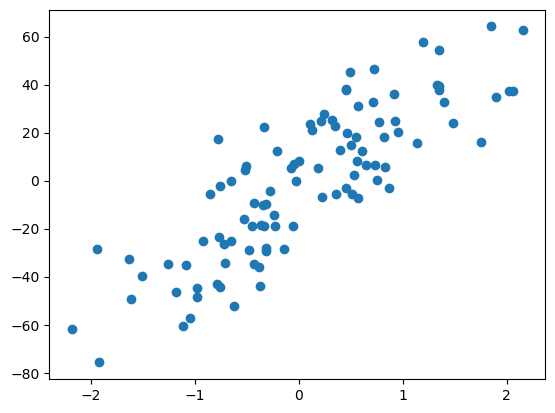

In [11]:
plt.scatter(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

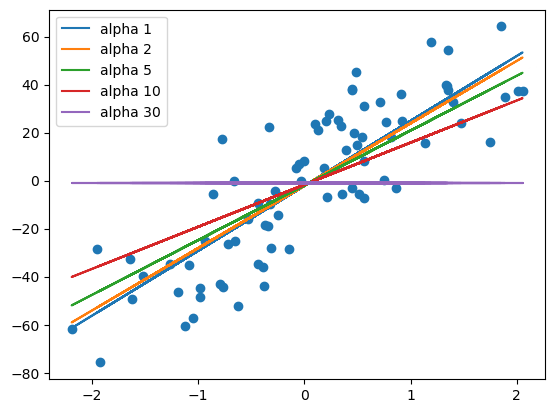

In [14]:
# sklearn implementation of Lasso regression
alphas = [1,2,5,10,30]
plt.scatter(X_train,y_train)
for alpha in alphas:
    la = Lasso(alpha=alpha)
    la.fit(X_train,y_train)
    plt.plot(X_train,la.predict(X_train),label=f"alpha {alpha}")
plt.legend()
plt.show()

#### Clear difference:  
In Ridge Regression the coefficients never dropped to 0 no matter what the value of alpha was, but here it can be seen that at alpha 30, value of coeffieient has dropped to 0.
<br>  
This is actually a huge favour provided by Lasso regression, it automatically does feature selection for us as well... how? it will drop the coefficients down to 0 of those features which are not that important (having alpha tuned):if alpha's value is incrased too much, it will drop every feature's coefficient to 0.

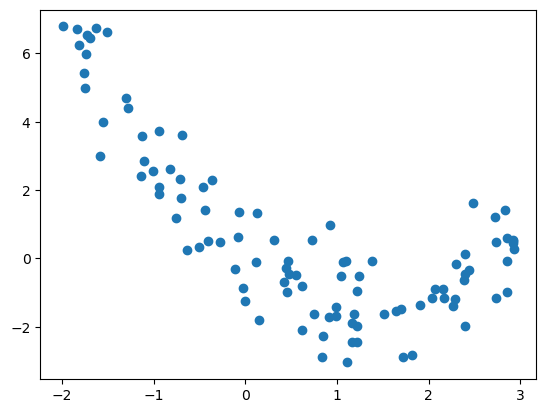

In [15]:
# now let's check things out on polynomial linear regression
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 - 2* x1 + np.random.randn(m,1)
plt.scatter(x1,x2)

C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+01, tolerance: 6.341e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

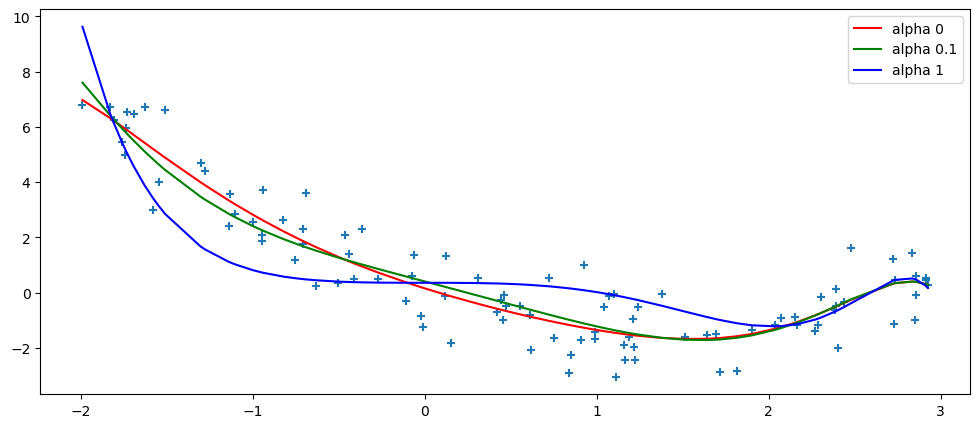

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_lasso_pred(x1, x2, alpha):
    model = Pipeline([
        ('poly',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alpha_color = {'r':0,'g':0.1,'b':1}
plt.figure(figsize=(12,5))
plt.scatter(x1,x2,marker='+')
for color,alpha in alpha_color.items():
    pred = get_lasso_pred(x1,x2,alpha)
    plt.plot(sorted(x1),pred[np.argsort(x1.ravel())],c=color,label=f"alpha {alpha}")
plt.legend()
plt.show()

In [21]:
np.argsort(x1.ravel())

array([15, 88, 72, 94, 64, 13, 86, 21, 41, 42, 34, 20, 36, 47, 59, 43, 75,
       81, 67, 96, 98,  2, 85, 97, 77, 83, 32, 19, 78, 56, 45, 28, 16, 89,
       35, 66, 60, 74, 91, 50, 29, 55, 87, 11, 22, 39,  3, 27, 79, 80, 44,
       33, 14, 95, 90, 40, 30, 52, 37, 24, 10,  6,  8, 18, 31, 49, 93, 53,
       76, 58, 48,  1, 26, 25, 69, 84, 68, 17, 70, 82, 71,  9, 62, 54, 51,
       38, 65,  0, 73, 99,  7,  4, 12,  5, 92, 57, 63, 23, 61, 46])

## Key Points

### how are coefficients are affected?  
![ytss](assets/alpha_impact.png)

## Key Points

### how are coefficients are affected?  
![ytss](assets/alpha_impact.png)  
### higher coefficients are affected more  
alpha increases: bias decreases, varaince increases
![ytss](assets/bv.png)